<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/15_workshop_data_augmentation_estandarizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

- featurewise_center: media a 0
- featurewise_std_normalization: desviación estandar

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Estandarización

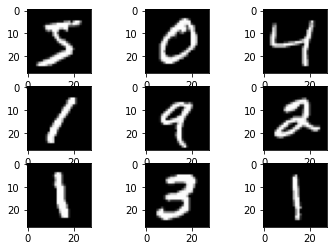

In [3]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
#Instanciar el estimador ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

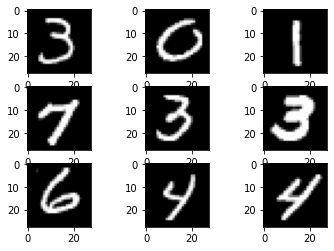

In [8]:
#batch_size - Porque tiene 9 posibles caracteres
#Metodo  estandarizar las imagenes
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

In [9]:
#X_batch[0] , X_train[0]

#Redución de la dimensionalidad

In [10]:
datagen = ImageDataGenerator(zca_whitening=True)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [11]:
datagen.fit(X_train)

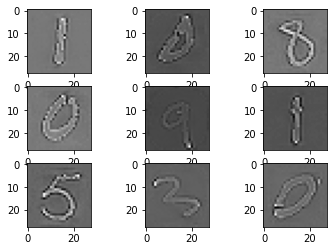

In [12]:
# No se pierde la estructura de la imagen
#Generaliza más 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

# Rotaciones aleatorias

In [13]:
# Precaución con la rotación
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)

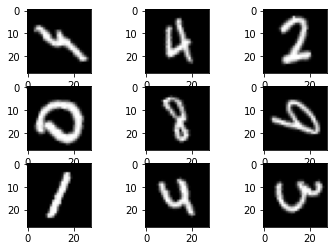

In [14]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

La rotación del numero uno no tiene sentido

In [15]:
datagen = ImageDataGenerator(rotation_range=10)
datagen.fit(X_train)

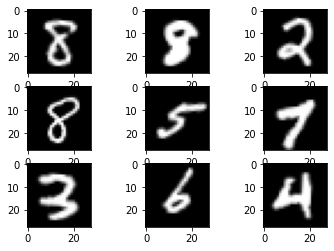

In [16]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

# Desplazamiento


In [17]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(X_train)

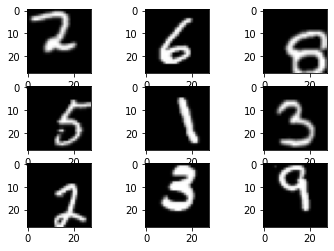

In [18]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

#Giros aleatorios

In [19]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

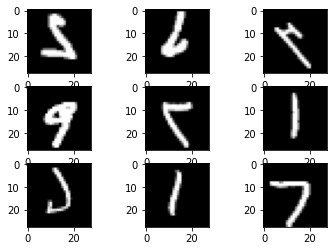

In [20]:
#Algunos giros no tendran sentido
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

# Guardar Iamgenes generadas

In [22]:
# Está modalidad es ideal, para no saturar la memoria
import os

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


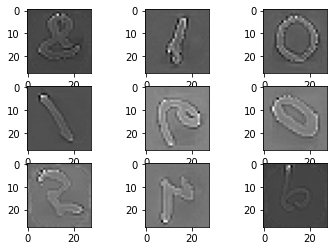

In [24]:
os.makedirs('Images')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,zca_whitening=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='Images',save_prefix='aug',save_format='png'):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break
